# Описание:

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откройте файл с данными и изучите общую информацию

Импортируем необходимые библиотеки для дальнейшей работы, затем прочитаем файл /datasets/games.csv и сохраним его в переменной data.

In [1]:
# импорт библиотеки pandas
import pandas as pd 
# библиотеки для визуализации
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
# импортируем библиотеки для мат.расчетов
import random
import math
import numpy as np
from scipy import stats as st

data=pd.read_csv('/datasets/games.csv') # чтение файла с данными с сохранением в data

Для знакомства данными, выведем на экран первые 5 строк таблицы.

In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Таблица имеет 11 колонок, а именно:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB

Получим общую информацию о данных таблицы используя метод info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения.

### Вывод

#### 1. При знакомстве с таблицой видно, что 6 столбцов имеют пустые значения, а именно:
Name — название игры 
Year_of_Release — год выпуска
Genre — жанр игры
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB

#### 2. Неправильно выбран тип данных для столбцов.
Year_of_Release — год выпуска тип данных float64, вместо datetime
User_Score — оценка пользователей (максимум 10) - object, вместо float64

## Шаг 2. Подготовьте данные


Обработайте пропуски при необходимости:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

#### 2.1 Замените названия столбцов (приведите к нижнему регистру)

In [5]:
data.columns = map(str.lower, data.columns)

Проверим замену.

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

#### Пытаемся заполнить пропуск в name.

In [7]:
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что пропуски в name и genre совпадают. Также видно, что продажи одной из игр составили 2,4 млн$, наверно это интересная игра, попробуем узнать её название.
Известно только дата релиза, платформа, продажи. Нет ни рейтинга, ни оценок от критиков.
Очень сложно определить связь для восстановления названия игры.
Возможно есть шанс определить по платфомам на которых она выходила и средними продажами.
Определим для начала список платформ на которх входили игры в 1993.

In [8]:
data.query('year_of_release==1993')['platform'].unique()

array(['SNES', 'GEN', 'NES', 'SCD', 'NG'], dtype=object)

Посмотрим на другие игры, которые выходили на платформе GEN

In [9]:
#сделаем список из названий игр за 1993 платформа GEN имя не 0
name_1993_gen=data.query('year_of_release==1993 & name.notnull() & platform=="GEN"')['name']
# какие игры тоже выходили на gen
name_1993_gen

7885                                      Shining Force II
8893                               Super Street Fighter II
11986                              Ecco: The Tides of Time
12098    Street Fighter II': Special Champion Edition (...
12264                                    Streets of Rage 3
12984                                      Dynamite Headdy
13343                                         Beyond Oasis
Name: name, dtype: object

Предположим, что если игра выходила на платформе GEN, то у неё есть обязательно релиз на другой платформе. 
Проверим.

In [10]:
# словарь где ключ имя игры,значение платформы
dict_name_1993_gen={}
for game in name_1993_gen:
    dict_name_1993_gen[game]=list(data.query('name==@game')['platform'])
dict_name_1993_gen

{'Shining Force II': ['GEN'],
 'Super Street Fighter II': ['SNES', 'GEN'],
 'Ecco: The Tides of Time': ['GEN'],
 "Street Fighter II': Special Champion Edition (JP weekly sales)": ['GEN'],
 'Streets of Rage 3': ['GEN'],
 'Dynamite Headdy': ['GEN'],
 'Beyond Oasis': ['GEN']}

Видим, что гипотеза оказалась неверной. Если игра выходит на GEN, то практически на других платформах не выходит, кроме как мы видим 'Super Street Fighter II'. Найти связи для восстановления названия игры не удалось.

Удалим строки, где пропущены значения в названии игры.

In [11]:
data.dropna(subset = ['name'],inplace = True)

In [12]:
data=data.reset_index(drop=True)

In [13]:
data.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### 2.3 Пытаемся заполнить пропуски в year_of_release.

In [14]:
# сохраним в список названия игр где год не указан
list_of_name_where_year_isnull=list(data.query('year_of_release.isnull()')['name'].unique())
list_of_name_where_year_isnull

['Madden NFL 2004',
 'FIFA Soccer 2004',
 'LEGO Batman: The Videogame',
 'wwe Smackdown vs. Raw 2006',
 'Space Invaders',
 'Rock Band',
 "Frogger's Adventures: Temple of the Frog",
 'LEGO Indiana Jones: The Original Adventures',
 'Call of Duty 3',
 'Call of Duty: Black Ops',
 'Triple Play 99',
 'Adventure',
 'Combat',
 'LEGO Harry Potter: Years 5-7',
 'NASCAR Thunder 2003',
 'Hitman 2: Silent Assassin',
 'Legacy of Kain: Soul Reaver',
 'Donkey Kong Land III',
 'Air-Sea Battle',
 'Suikoden III',
 'Wheel of Fortune',
 'Yakuza 4',
 'Namco Museum',
 'Rhythm Heaven',
 'The Lord of the Rings: War in the North',
 'Madden NFL 07',
 'MLB SlugFest 20-03',
 'Shaun White Snowboarding',
 'PES 2009: Pro Evolution Soccer',
 'WarioWare: Twisted!',
 'Madden NFL 11',
 'Test Drive Unlimited 2',
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
 'Monster Hunter 2',
 'Metal Gear Solid 2: Substance',
 'Advance Wars: Days of Ruin',
 'The Golden Compass',
 'Madden NFL 06',
 'NASCAR: Dirt to D

In [15]:
# создаем словарь
dict_of_null_year={}
# список в котором храним ключи у которых больше одного значения
list_of_keys_whith_many_values=[]
for game_name in list_of_name_where_year_isnull:
    # добавляем в словарь только те значения пар ключ, где нет пустых значений о годе релиза
    if len(list(data.query('name==@game_name & year_of_release.notnull()')['year_of_release']))>1:
        list_of_keys_whith_many_values.append(game_name)
        dict_of_null_year[game_name]=list(data.query('name==@game_name & year_of_release.notnull()')['year_of_release'])
    elif len(list(data.query('name==@game_name & year_of_release.notnull()')['year_of_release']))==1:
        dict_of_null_year[game_name]=list(data.query('name==@game_name & year_of_release.notnull()')['year_of_release'])[0]
dict_of_null_year

{'Madden NFL 2004': [2003.0, 2003.0, 2003.0],
 'FIFA Soccer 2004': [2003.0, 2003.0, 2003.0],
 'LEGO Batman: The Videogame': [2008.0, 2008.0, 2008.0, 2008.0, 2008.0],
 'Space Invaders': [1994.0, 1999.0, 2002.0],
 'LEGO Indiana Jones: The Original Adventures': [2008.0,
  2008.0,
  2008.0,
  2008.0,
  2008.0,
  2008.0],
 'Call of Duty 3': [2006.0, 2006.0, 2006.0],
 'Call of Duty: Black Ops': [2010.0, 2010.0, 2010.0, 2010.0],
 'LEGO Harry Potter: Years 5-7': 2012.0,
 'NASCAR Thunder 2003': [2002.0, 2002.0],
 'Hitman 2: Silent Assassin': [2002.0, 2003.0],
 'Wheel of Fortune': [1998.0, 2010.0, 2010.0, 1997.0],
 'Namco Museum': [2001.0, 2001.0, 2002.0],
 'Rhythm Heaven': 2008.0,
 'The Lord of the Rings: War in the North': 2011.0,
 'Madden NFL 07': [2006.0,
  2006.0,
  2006.0,
  2006.0,
  2006.0,
  2006.0,
  2006.0,
  2006.0],
 'MLB SlugFest 20-03': [2002.0, 2002.0],
 'Shaun White Snowboarding': [2008.0, 2008.0, 2008.0, 2008.0],
 'PES 2009: Pro Evolution Soccer': [2008.0, 2008.0, 2008.0, 2009.

Мы видим, что игры в основном, если игра выпускалась, то в один и тот же год она выпускалась на всех платформах сразу.
Но есть исключения.
Считаю будет правильно, если заполним пустые значения "средним" годом между датами релизов, чем выбросим строки с пустыми значениями совсем. При этом проведем дополнительную проверку на то, что платформа на которой выпускалась игра, должна соответствовать периоду в котором игры выпускались для конкретной платформы(консоли).

Пример: допустим игра Дьябло 4,  релиз для PC-2019,  
Предположим, что у нас есть пропуск игры Дьябло 4 для платформы Дэнди.
Проверка заключается в том, чтобы посмотреть, если игры для Дэнди выпускались в период с 1990 до 2000, а у нас значение которое хотим подтянуть равно 2019, то мы не будем этого делать, т.к. есть несоответствии с периодом подднержки платформы.

Обновим наш словарь средними значениями.

In [16]:
# функция перезаписи словаря по ключу с присваиванием ключу среднего значения
def refresh_dict(dict_to_refresh, list_of_keys):
    for name in list_of_keys:
        total=0
        for i in range(len(dict_to_refresh[name])):
            total+=dict_to_refresh[name][i]
            mean_value=total/len(dict_to_refresh[name])
        del dict_to_refresh[name]
        dict_to_refresh[name]=math.ceil(mean_value)
    return

In [17]:
refresh_dict(dict_of_null_year, list_of_keys_whith_many_values)

Создадим список уникальных платформ

In [18]:
# список уникальных платформ
list_of_platform=list(data['platform'].unique())
# составим словарь где ключ platform, первое год окончания поддержки, а второе год первого выхода
dict_of_platform={}
for name in list_of_platform:
    dict_of_platform[name]=data.query('platform==@name & year_of_release.notnull()')['year_of_release'].min()
    dict_of_platform[name]=([data.query('platform==@name & year_of_release.notnull()')['year_of_release'].max(),dict_of_platform[name]])
dict_of_platform

{'Wii': [2016.0, 2006.0],
 'NES': [1994.0, 1983.0],
 'GB': [2001.0, 1988.0],
 'DS': [2013.0, 1985.0],
 'X360': [2016.0, 2005.0],
 'PS3': [2016.0, 2006.0],
 'PS2': [2011.0, 2000.0],
 'SNES': [1999.0, 1990.0],
 'GBA': [2007.0, 2000.0],
 'PS4': [2016.0, 2013.0],
 '3DS': [2016.0, 2011.0],
 'N64': [2002.0, 1996.0],
 'PS': [2003.0, 1994.0],
 'XB': [2008.0, 2000.0],
 'PC': [2016.0, 1985.0],
 '2600': [1989.0, 1980.0],
 'PSP': [2015.0, 2004.0],
 'XOne': [2016.0, 2013.0],
 'WiiU': [2016.0, 2012.0],
 'GC': [2007.0, 2001.0],
 'GEN': [1994.0, 1990.0],
 'DC': [2008.0, 1998.0],
 'PSV': [2016.0, 2011.0],
 'SAT': [1999.0, 1994.0],
 'SCD': [1994.0, 1993.0],
 'WS': [2001.0, 1999.0],
 'NG': [1996.0, 1993.0],
 'TG16': [1995.0, 1995.0],
 '3DO': [1995.0, 1994.0],
 'GG': [1992.0, 1992.0],
 'PCFX': [1996.0, 1996.0]}

Заполнимпропуски в годе там, где это возможно.

In [19]:
list_of_null_keys=list(dict_of_null_year.keys())
list_of_null_keys

for game_name in list_of_null_keys:
    
    if len(list(data.query('year_of_release.isnull() & name==@game_name')['year_of_release']))>1:
        list_of_index=data.query('year_of_release.isnull() & name==@game_name')['year_of_release'].index.tolist()
        for i in range(len(list_of_index)):
            name_of_platform=data.loc[list_of_index[i], 'platform']
            if dict_of_platform[name_of_platform][0]>=dict_of_null_year[game_name]>=dict_of_platform[name_of_platform][1]:
                index=data.query('year_of_release.isnull() & platform==@name_of_platform & name==@game_name')['year_of_release'].index.tolist()
                data.loc[index, 'year_of_release']=data.loc[index, 'year_of_release'].fillna(dict_of_null_year[game_name])
    else:
        list_of_index=data.query('year_of_release.isnull()& name==@game_name')['year_of_release'].index.tolist()
        if dict_of_platform[name_of_platform][0]>=dict_of_null_year[game_name]>=dict_of_platform[name_of_platform][1]:
            data.loc[list_of_index, 'year_of_release']=data.loc[list_of_index, 'year_of_release'].fillna(dict_of_null_year[game_name])                  

Подсчитаем количество пропущенных значений в столбце 'year_of_release'

In [20]:
data['year_of_release'].isnull().sum()

170

Мы заполнили 99 значений с годом.
Остальные строки, где пропущены значения - удалим.

In [21]:
data.dropna(subset = ['year_of_release'],inplace = True)

In [22]:
data=data.reset_index(drop=True)

In [23]:
data['year_of_release']=data['year_of_release'].astype('int')

In [24]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8489
user_score         6630
rating             6696
dtype: int64

#### 2.4 посмотрим корееляцию рейтингов

Чтобы посмотреть на корреляцию, необходимо сравниваемые столбцы привести к числовому формату.
Столбец 'user_score' имеет тип данных object, хотяв описании там должны быть оценки от 0 до 10.
Посмотрим на уникальне значения этого столбца.

In [25]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Тип данных object был из-за значения "tbd", данная аббревиатура известна to be defined. Посути значение "tbd" не отличаетсяот NaN, т.к. в обоих этих случаях пока рейтинг не определен.
Воспользуемся методом to_numeric он используется для преобразования аргумента в числовой тип.
Сделаем преобразование для столбца 'user_score'.

In [26]:
# errors = coerce означает, что неверный разбор будет установлен как NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [27]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8489
user_score         9021
rating             6696
dtype: int64

Значений NaN в столбце user_score стало на 2391 больше, как говорит Малышева - это норма!
Посмотрим на корреляцию рейтингов.

In [28]:
data.corr().style.background_gradient(cmap='coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1,-0.0924026,0.00403984,-0.168534,0.0377688,0.0117453,-0.266231
na_sales,-0.0924026,1,0.76655,0.450874,0.638573,0.239604,0.0853902
eu_sales,0.00403984,0.76655,1,0.435633,0.722829,0.22072,0.0555302
jp_sales,-0.168534,0.450874,0.435633,1,0.291448,0.152997,0.126102
other_sales,0.0377688,0.638573,0.722829,0.291448,1,0.197835,0.0568469
critic_score,0.0117453,0.239604,0.22072,0.152997,0.197835,1,0.579052
user_score,-0.266231,0.0853902,0.0555302,0.126102,0.0568469,0.579052,1


In [29]:
data[['user_score','critic_score']].corr()

,user_score,critic_score
user_score,1.000000,0.579052
critic_score,0.579052,1.000000


Видим, что есть положительна корреляция. Воспользуемся этим для заполнения столбцов рейтингов имеющие пустые значения.
Определим поправочный коэфициэнт для определения рейтинга одного из другого.
Для удобства сравнения коэффициэнтов 'critic_score' и 'user_score' приведем столбец 'critic_score' к значениям от 0 до 10, вместо от 0 до 100.


Столбец 'critic_score' имеет значения от 0 до 100, сделаем его как от 0 до 10,разделив все значения на 10,а затем проведем анализ.


In [30]:
data['critic_score']=data['critic_score']/10

Введем столбец 'critic_score_to_user_score' в котором будем хранить отношение рейтинга 'critic_score' к 'user_score'

In [31]:
data['critic_score_to_user_score']=data['critic_score']/data['user_score']
data['critic_score_to_user_score'].describe()

count    6951.000000
mean        1.010795
std         0.317815
min         0.303371
25%         0.876404
50%         0.974684
75%         1.075949
max        12.000000
Name: critic_score_to_user_score, dtype: float64

Мы видим, что среднее значение(1.010795) рейтингов равны, также это видно и по медиане(0.974684)
Замечены выбросы, посмотрим на них с помощью диаграмы размаха.

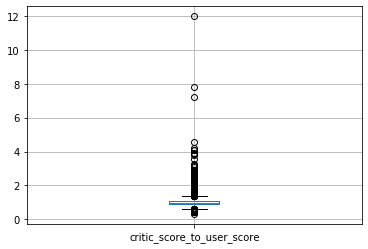

In [32]:
# построим диаграмму размаха
data.boxplot('critic_score_to_user_score')

(0, 1.5)

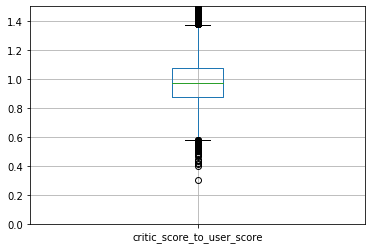

In [33]:
# увеличим маштаб до 1.5
data.boxplot('critic_score_to_user_score')
plt.ylim(0, 1.5)

Если аномалий меньше 10%, то мы смело можем отбросить эти выбросы. Подсчитаем количество аномалий.

In [34]:
print('Выбросы составляют:{:.2%}'.format(
    # всего непустых значений в столбце critic_score_to_user_score
    (data.query('critic_score_to_user_score.notnull()')['critic_score_to_user_score'].count()
    # всего валидных значений ограниченные усами ящика
     -data.query('critic_score_to_user_score.notnull() & 0.6<critic_score_to_user_score<1.38')
     ['critic_score_to_user_score'].count())/
    data.query('critic_score_to_user_score.notnull()')['critic_score_to_user_score'].count()))


Выбросы составляют:6.95%


Отбросим выбросы и рассчитаем коэффициэнт для восстановления рейтинга.

In [35]:
data.query('critic_score_to_user_score.notnull() & 0.6<critic_score_to_user_score<1.38')['critic_score_to_user_score'].describe()

count    6468.000000
mean        0.967253
std         0.146754
min         0.600000
25%         0.873418
50%         0.965517
75%         1.055712
max         1.379310
Name: critic_score_to_user_score, dtype: float64

Поправочный коэффициент равен 0.97

In [36]:
# определим индексы
index_list_where_critic_score_isnull=data.query('critic_score.isnull() & user_score.notnull()')['critic_score'].index.tolist()
# сделаем замену
data.loc[index_list_where_critic_score_isnull,'critic_score']=data.loc[index_list_where_critic_score_isnull,'user_score']*0.97

In [37]:
data.isnull().sum()

name                             0
platform                         0
year_of_release                  0
genre                            0
na_sales                         0
eu_sales                         0
jp_sales                         0
other_sales                      0
critic_score                  7918
user_score                    9021
rating                        6696
critic_score_to_user_score    9592
dtype: int64

In [38]:
# определим индексы
index_list_where_user_score_isnull=data.query('user_score.isnull() & critic_score.notnull()')['critic_score'].index.tolist()
# сделаем замену
data.loc[index_list_where_user_score_isnull,'user_score']=data.loc[index_list_where_user_score_isnull,'critic_score']/0.97

In [39]:
data.isnull().sum()

name                             0
platform                         0
year_of_release                  0
genre                            0
na_sales                         0
eu_sales                         0
jp_sales                         0
other_sales                      0
critic_score                  7918
user_score                    7918
rating                        6696
critic_score_to_user_score    9592
dtype: int64

#### 2.5 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [40]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [41]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_to_user_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,0.950000,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,0.987952,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,1.000000,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38


In [42]:
# топ 10 самых продаваемых игр
data.groupby('name')['total_sales'].sum().sort_values(ascending = False)[0:10]

name
Wii Sports                        82.54
Grand Theft Auto V                56.58
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.38
Call of Duty: Black Ops           30.82
Call of Duty: Modern Warfare 3    30.60
New Super Mario Bros.             29.80
Name: total_sales, dtype: float64

Text(0.5, 1.0, 'Распределение выручки от продаж по годам')

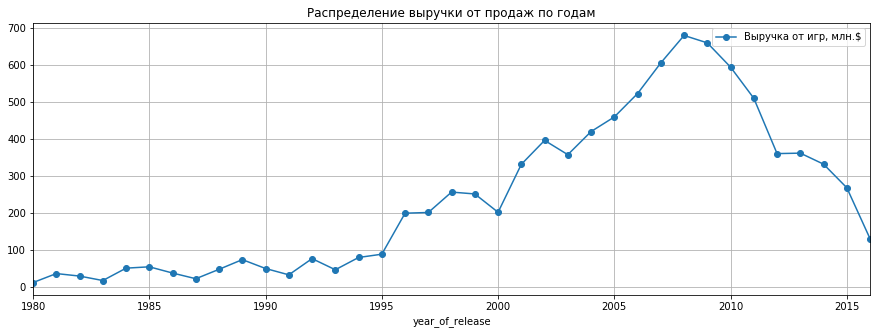

In [43]:
sales_of_year=data.groupby('year_of_release')['total_sales'].sum()
sales_of_year.plot(grid=True, style='o-',figsize=(15, 5))
plt.legend(['Выручка от игр, млн.$'])
plt.title("Распределение выручки от продаж по годам")

### Вывод:

##### Заполнили пропуски там где это было возможно, подсчитайли суммарные продажи во всех регионах и записали их в отдельный столбец

## Шаг 3. Проведите исследовательский анализ данных

#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [44]:
# считаем количество игр выпускаемых в разные годы
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     339
2000     350
2001     482
2002     835
2003     778
2004     765
2005     946
2006    1019
2007    1202
2008    1440
2009    1431
2010    1269
2011    1152
2012     662
2013     547
2014     582
2015     606
2016     502
Name: name, dtype: int64

##### Мы видим, что до 1994 года количество выпускаемых игр не привышало 60, затем резкий всплеск с последующим ростом до 2008 года. Отобразим это на графике.

Text(0.5, 1.0, 'Количество выпускаемых игр по годам')

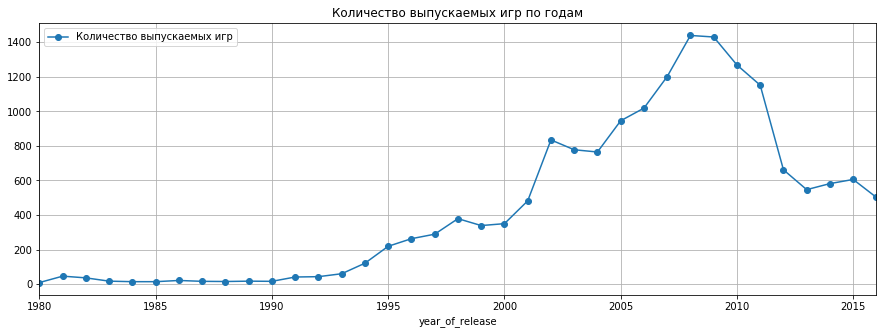

In [45]:
# строим график
data.groupby('year_of_release')['name'].count().plot(grid=True, style='o-',figsize=(15, 5))
plt.legend(['Количество выпускаемых игр'])
plt.title("Количество выпускаемых игр по годам")

##### На графике видно, что количество выпускаемых игр из года в год росло до 2008, затем начало сокращаться. Распределение выпускаемых игр похоже на нормальное распределение (колокол). При этом мы видели ранее, что выручка от игр росла до 2008, и это значит, что чем больше выпускалось игр, тем больше было выручки.

Почему же производители стали выпускать меньше игр?
Почему упали продажи?
Попробуем ответить на поставленные вопросы.

#### 3.2 Посмотрим, как менялись продажи по платформам.
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
Посмотрите, как менялись продажи по платформам. 

Text(0.5, 1.0, 'Суммарная выручка от продаж игр в соответствии с годом')

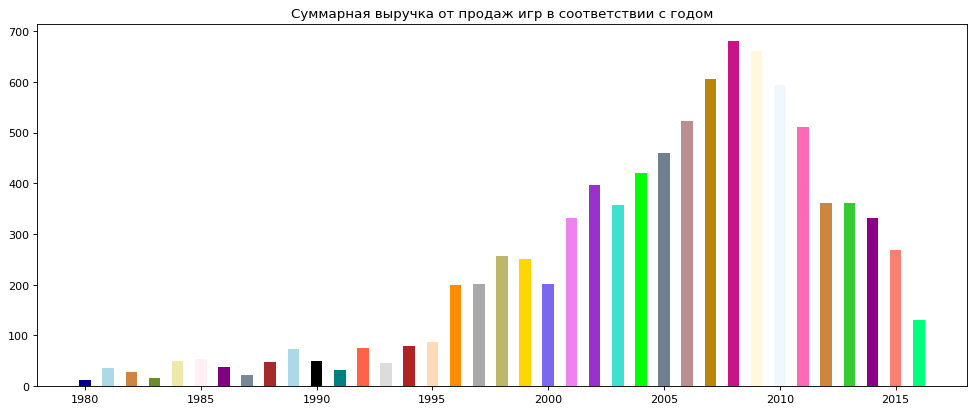

In [46]:
# построим график полученой выручки в соответствии с годом
pivot_year_sales=data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
all_colors = list(plt.cm.colors.cnames.keys())
n = len(pivot_year_sales.index.tolist())
random.seed(100)
c = random.choices(all_colors,k=n)
plt.figure(figsize=(15,6), dpi= 80)
plt.bar(pivot_year_sales.index.tolist(), pivot_year_sales['total_sales'],color=c, width=.5) 
plt.title('Суммарная выручка от продаж игр в соответствии с годом')

##### График распределение выручки по годам похож на нормальное распределение.
##### Видно, что игры выпускаемые на платформах прошли свой пик продаж в 2008 и сейчас в стадии затухания, дело в том, что появился новый рынок игр для мобильных устройств,который отъедает позиции у приставок.
##### Видим, что в 2015-2016 выручка составляла уровень конца 90х начала 2000 годов. А значит в 2017 выручка будет примерно на этом уровне тех лет.

#### 3.3 За какой характерный срок появляются новые и исчезают старые платформы?
Построим графики линий жизни платформ в зависимости от приносимой выручки.

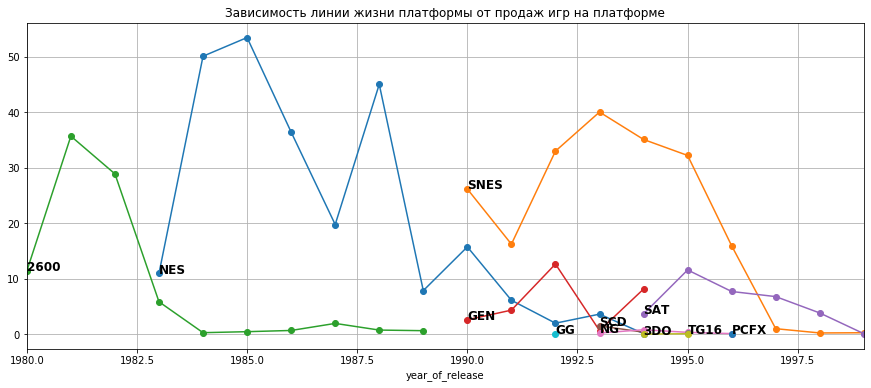

In [47]:
for name in list_of_platform:
    if dict_of_platform[name][0]<2000:
        data.query('platform==@name')[['year_of_release','total_sales']].groupby('year_of_release')['total_sales'].sum().plot(grid=True, style='o-',figsize=(15, 6))
        plt.title("Зависимость линии жизни платформы от продаж игр на платформе")
        plt.text(dict_of_platform[name][1],list(data.query('platform==@name')[['year_of_release','total_sales']].groupby('year_of_release')['total_sales'].sum())[0],name, size="large",weight="bold")

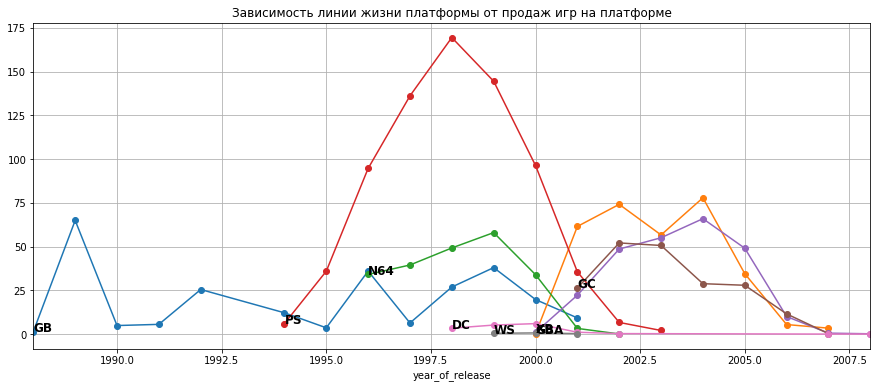

In [48]:
for name in list_of_platform:
    if 2000<dict_of_platform[name][0]<2010:
        data.query('platform==@name')[['year_of_release','total_sales']].groupby('year_of_release')['total_sales'].sum().plot(grid=True, style='o-',figsize=(15, 6))
        plt.title("Зависимость линии жизни платформы от продаж игр на платформе")
        plt.text(dict_of_platform[name][1],list(data.query('platform==@name')[['year_of_release','total_sales']].groupby('year_of_release')['total_sales'].sum())[0],name, size="large",weight="bold")

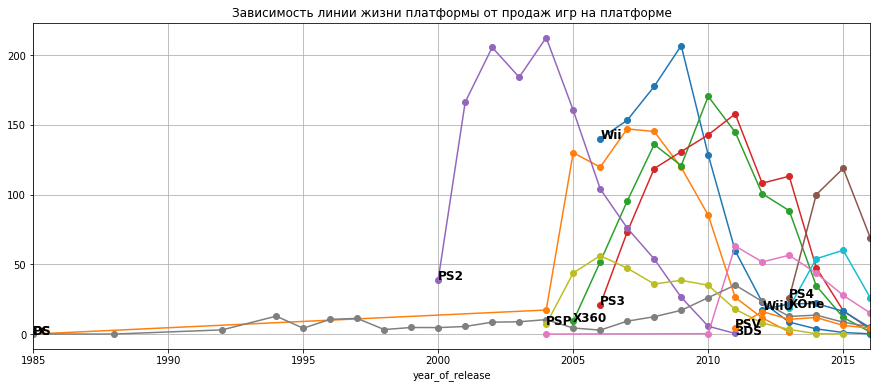

In [49]:
for name in list_of_platform:
    if 2010<dict_of_platform[name][0]<2017:
        data.query('platform==@name')[['year_of_release','total_sales']].groupby('year_of_release')['total_sales'].sum().plot(grid=True, style='o-',figsize=(15, 6))
        plt.title("Зависимость линии жизни платформы от продаж игр на платформе")
        plt.text(dict_of_platform[name][1],list(data.query('platform==@name')[['year_of_release','total_sales']].groupby('year_of_release')['total_sales'].sum())[0],name, size="large",weight="bold")

##### Даже несмотря на громоздкость последнего графика отчетливо видно, как игры которые имели успех подченены нормальному распределению (имеют форму колокола) и отчетлива видна продолжительность жизни платформы.

In [50]:
#сколько лет живет платформа,добавим значение в ранее созданный словарь dict_of_platform
for key in dict_of_platform.keys():
    dict_of_platform[key].append(dict_of_platform[key][0]-dict_of_platform[key][1])
dict_of_platform    

{'Wii': [2016.0, 2006.0, 10.0],
 'NES': [1994.0, 1983.0, 11.0],
 'GB': [2001.0, 1988.0, 13.0],
 'DS': [2013.0, 1985.0, 28.0],
 'X360': [2016.0, 2005.0, 11.0],
 'PS3': [2016.0, 2006.0, 10.0],
 'PS2': [2011.0, 2000.0, 11.0],
 'SNES': [1999.0, 1990.0, 9.0],
 'GBA': [2007.0, 2000.0, 7.0],
 'PS4': [2016.0, 2013.0, 3.0],
 '3DS': [2016.0, 2011.0, 5.0],
 'N64': [2002.0, 1996.0, 6.0],
 'PS': [2003.0, 1994.0, 9.0],
 'XB': [2008.0, 2000.0, 8.0],
 'PC': [2016.0, 1985.0, 31.0],
 '2600': [1989.0, 1980.0, 9.0],
 'PSP': [2015.0, 2004.0, 11.0],
 'XOne': [2016.0, 2013.0, 3.0],
 'WiiU': [2016.0, 2012.0, 4.0],
 'GC': [2007.0, 2001.0, 6.0],
 'GEN': [1994.0, 1990.0, 4.0],
 'DC': [2008.0, 1998.0, 10.0],
 'PSV': [2016.0, 2011.0, 5.0],
 'SAT': [1999.0, 1994.0, 5.0],
 'SCD': [1994.0, 1993.0, 1.0],
 'WS': [2001.0, 1999.0, 2.0],
 'NG': [1996.0, 1993.0, 3.0],
 'TG16': [1995.0, 1995.0, 0.0],
 '3DO': [1995.0, 1994.0, 1.0],
 'GG': [1992.0, 1992.0, 0.0],
 'PCFX': [1996.0, 1996.0, 0.0]}

In [51]:
# узнаем сколько в среднем живет платформа
list_of_year=[]
for i in range(len(dict_of_platform)):
    list_of_year.append(list(dict_of_platform.values())[i][2])
pd.DataFrame(list_of_year).describe()

,0
count,31.000000
mean,7.612903
std,6.998464
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,31.000000


##### По результатам расчетов видим, что платформы живут в среднем 7,6 лет, медианное зачение 6 лет. 

Text(0.5, 1.0, 'Продолжительность жизни платформы')

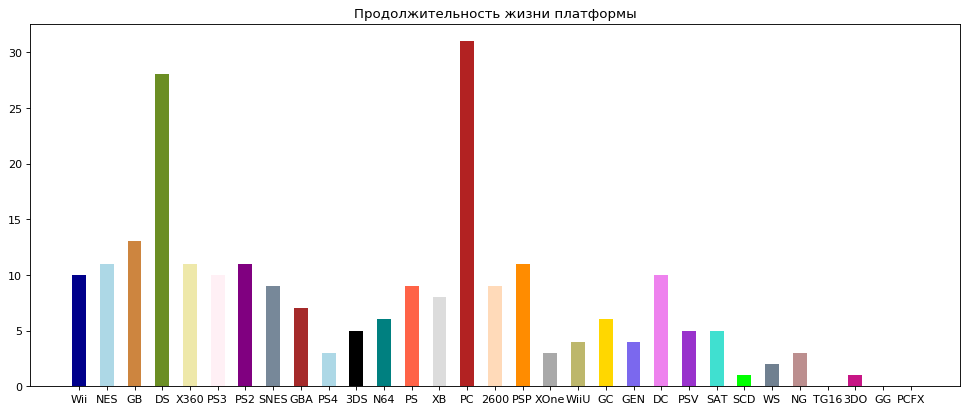

In [52]:
# построим график продолжительности жизни платформы
all_colors = list(plt.cm.colors.cnames.keys())
n = len(dict_of_platform)
random.seed(100)
c = random.choices(all_colors,k=n)
plt.figure(figsize=(15,6), dpi= 80)
plt.bar(dict_of_platform.keys(), list_of_year,color=c, width=.5) 
plt.title('Продолжительность жизни платформы')

##### Также есть и долгожители PC - 31 год. Платформы, которые не получают успеха - отмирают на 1м году жизни.

Text(0.5, 1.0, 'Размер выручки в соответствии с платформой на которой выпускались игры')

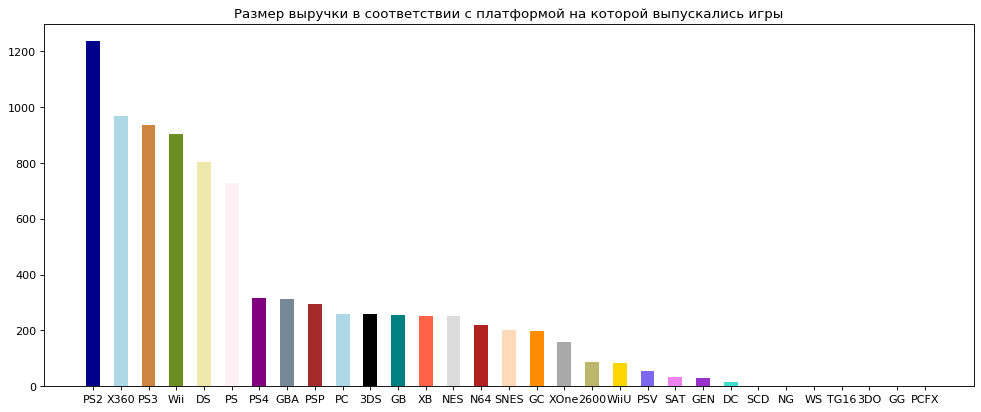

In [53]:
# построим график размер выручки в соответствии с платфомой
axis=pd.DataFrame(data.groupby('platform')['total_sales'].sum().sort_values(ascending = False))
all_colors = list(plt.cm.colors.cnames.keys())
n = len(axis.index.tolist())
random.seed(100)
c = random.choices(all_colors,k=n)
plt.figure(figsize=(15,6), dpi= 80)
plt.bar(axis.index.tolist(), axis['total_sales'],color=c, width=.5) 
plt.title('Размер выручки в соответствии с платформой на которой выпускались игры')

#### 3.5 Сравним продажи на платформах,для этого сделаем функцию compaire_sales

In [54]:
def compaire_sales(column,top):
    new_table=pd.DataFrame(data.groupby('platform')[column].sum().sort_values(ascending = False))
    if column=='total_sales':
        new_table['% от всех продаж в мире']=(new_table[column]/new_table['total_sales'].sum()*100).round(1)
        print(new_table[0:top])
    else:
        total_sales_world=data['total_sales'].sum()
        new_table['% от всех продаж в регионе']=(new_table[column]/new_table[column].sum()*100).round(1) 
        new_table['% от всех продаж в мире']=(new_table[column]/total_sales_world*100).round(1) 
        print(new_table[0:top])
compaire_sales('total_sales',10)

          total_sales  % от всех продаж в мире
platform                                      
PS2           1235.79                     14.0
X360           966.26                     10.9
PS3            934.52                     10.6
Wii            903.31                     10.2
DS             804.28                      9.1
PS             727.58                      8.2
PS4            314.14                      3.5
GBA            313.73                      3.5
PSP            293.57                      3.3
PC             258.81                      2.9


#### 3.6 Построим ящики с усами по ныне живущим платформам, для этого оставим в словаре dict_of_platform только актуальные платформы, которые дожили до 2016.

In [55]:
for name in list_of_platform:
    if dict_of_platform[name][0]<2016:
        del dict_of_platform[name]
dict_of_platform        

{'Wii': [2016.0, 2006.0, 10.0],
 'X360': [2016.0, 2005.0, 11.0],
 'PS3': [2016.0, 2006.0, 10.0],
 'PS4': [2016.0, 2013.0, 3.0],
 '3DS': [2016.0, 2011.0, 5.0],
 'PC': [2016.0, 1985.0, 31.0],
 'XOne': [2016.0, 2013.0, 3.0],
 'WiiU': [2016.0, 2012.0, 4.0],
 'PSV': [2016.0, 2011.0, 5.0]}

In [56]:
# составим список платформ на которых выпускаются 
list_of_promising_platform=dict_of_platform.keys()

(0, 2)

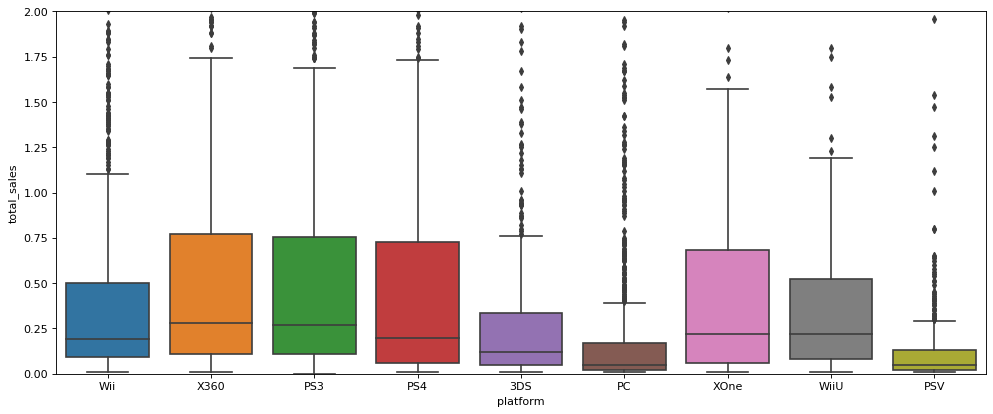

In [57]:
# cтроим ящики
plt.figure(figsize=(15,6), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=data.query('platform in @list_of_promising_platform'), notch=False)
plt.ylim(0, 2)


##### Необходимо выбрать актуальный период, т.к. прошлые успехи платформ могут искажать результаты сегодняшний лет.

In [58]:
# сравним выручку за последние 4 года
data.query('platform in @list_of_promising_platform & year_of_release>2011').groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,397.0,0.491209,1.385416,0.01,0.040,0.11,0.320,14.60
PC,255.0,0.249059,0.490149,0.01,0.030,0.08,0.240,5.14
PS3,494.0,0.586457,1.461448,0.01,0.050,0.20,0.610,21.05
PS4,392.0,0.801378,1.609456,0.01,0.060,0.20,0.730,14.63
PSV,411.0,0.119659,0.203011,0.01,0.020,0.05,0.120,1.96
Wii,55.0,0.665455,1.157206,0.01,0.065,0.18,0.790,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.080,0.22,0.525,7.09
X360,294.0,0.807891,1.706880,0.01,0.100,0.31,0.870,16.27
XOne,247.0,0.645020,1.036139,0.01,0.060,0.22,0.685,7.39


##### Оставим ТОП-5 платформ. С 4мя понятно, это X360, XOne, PS3, PS4 медианы и среднии у этих платформ высокие. 
##### Выберем пятую из Wii, WiiU и 3DS, смущает, что количество выпускаемы игр у Wii и WiiU в сумме меньше почти в два раза, чем   у 3DS. Сравним суммарную выручку.

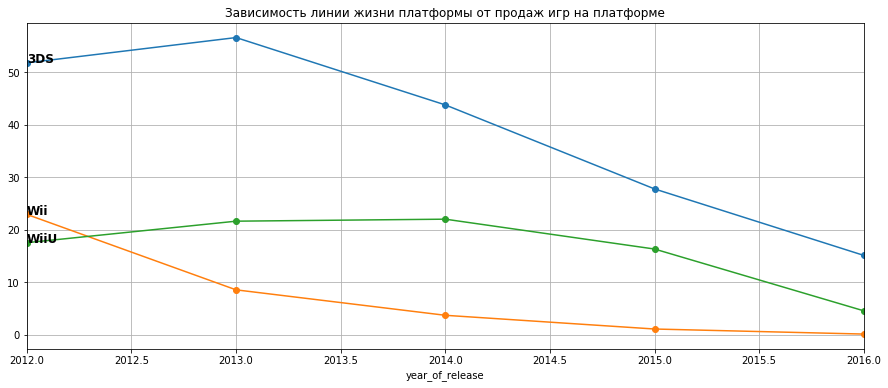

In [59]:
for name in ['3DS','Wii','WiiU']:
    data.query('platform==@name & year_of_release>2011')[['year_of_release','total_sales']].groupby('year_of_release')['total_sales'].sum().plot(grid=True, style='o-',figsize=(15, 6))
    plt.title("Зависимость линии жизни платформы от продаж игр на платформе")
    plt.text(2012,list(data.query('platform==@name & year_of_release>2011')[['year_of_release','total_sales']].groupby('year_of_release')['total_sales'].sum())[0],name, size="large",weight="bold")

##### Видим,что у 3DS отмирание более плавное и выручка от неё больше на данный момент, чем у Wii и WiiU. Возьмем 3DS как пятую платформу.

(0, 2)

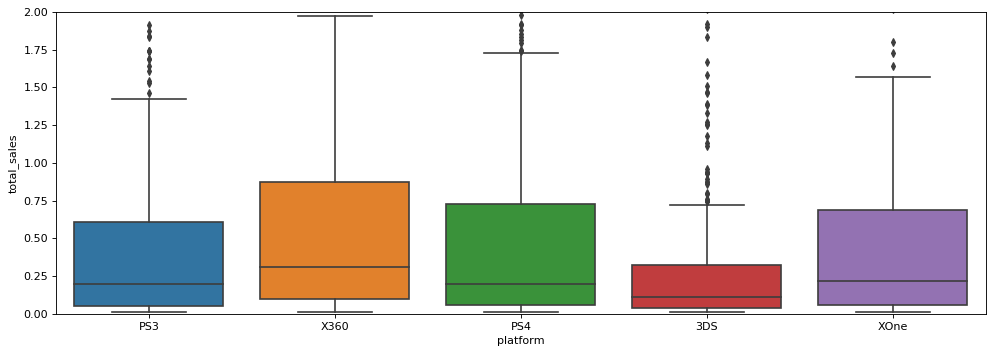

In [60]:
list_platform=['PS3', 'PS4', '3DS', 'X360', 'XOne']
plt.figure(figsize=(15,5), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=data.query('platform in @list_platform & year_of_release>2011'), notch=False)
plt.ylim(0, 2)

##### Видим,что медиана у Х360 выше всех, замыкает пятерку 3DS.

#### 3.7 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f530202e8d0>,
      dtype=object)

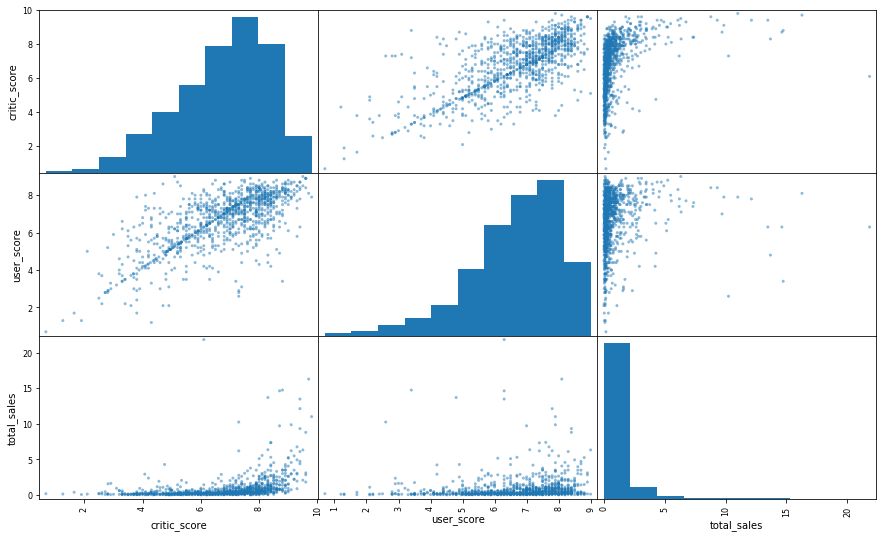

In [61]:
# выберем успешную платформу X360 и построим корреляцию
try_to_find_influence=data.query('platform=="X360" & critic_score.notnull()')[['critic_score','user_score','total_sales']]
pd.plotting.scatter_matrix(try_to_find_influence, figsize=(15, 9))

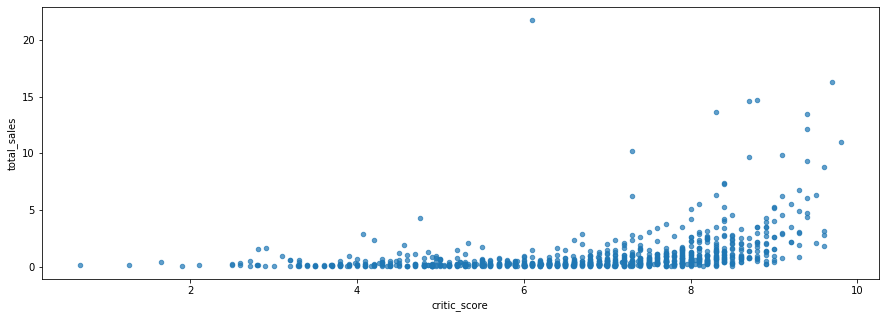

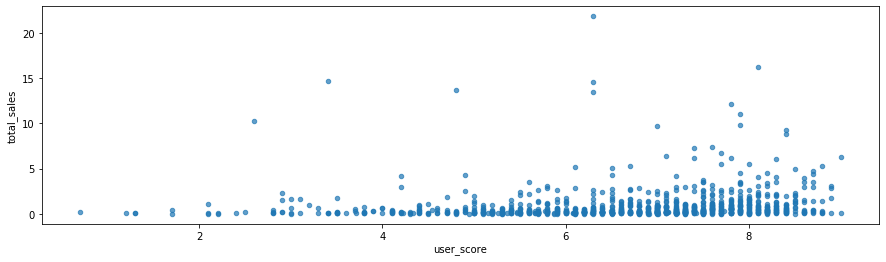

In [62]:
# увеличим масштаб
data.query('platform=="X360" & critic_score.notnull()')[['critic_score','user_score','total_sales']].plot(x='critic_score', y='total_sales', kind='scatter',alpha=0.7,figsize=(15, 5))
data.query('platform=="X360" & critic_score.notnull()')[['critic_score','user_score','total_sales']].plot(x='user_score', y='total_sales', kind='scatter',alpha=0.7,figsize=(15, 4))

##### На первом графике заметно небольшое влияние оценки критиков на выручку, если оценки критиков больше 7. Но исключения также видны, что при низкой оценки продажи могут быть высокими.

In [63]:
# посмотрим на корреляцию
data.query('platform=="X360" & critic_score.notnull()')[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.694204,0.372621
user_score,0.694204,1.000000,0.119279
total_sales,0.372621,0.119279,1.000000


##### Видим, что есть положительная корреляция отзывов на выручку, но она незначительная. Более выражена на вызовах от критиков.

#### 3.8 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах?

In [64]:
# количество выпущенных игр
compaire_genre=pd.DataFrame(data.groupby('genre')['name'].count().sort_values(ascending = False))
compaire_genre['%']=(compaire_genre['name']/compaire_genre['name'].sum()*100).round(2)
compaire_genre

,name,%
genre,,
Action,3338,20.18
Sports,2327,14.07
Misc,1733,10.48
Role-Playing,1483,8.96
Shooter,1308,7.91
Adventure,1294,7.82
Racing,1231,7.44
Platform,878,5.31
Simulation,860,5.20


##### Больше всего игр выпущено в жанре Action,  второе место Sports, третье место Misc(разнообразный жанр). Ролевые, шутеры прикючения и гонки примерно на одном ровне и делят 4-7места.

In [65]:
# топ 10 самых продаваемых игр по жанрам
def compaire_genres(market,top):
    print(pd.DataFrame(data.groupby('genre')[market].sum().sort_values(ascending = False))[0:top])
compaire_genres('total_sales',10)

              total_sales
genre                    
Action            1733.79
Sports            1315.91
Shooter           1046.96
Role-Playing       931.44
Platform           825.55
Misc               793.21
Racing             723.71
Fighting           443.59
Simulation         388.46
Puzzle             240.54


##### Самый прибыльный жанр Action, ТОП-5 замыкает Platform

In [66]:
# узнаем количество платформ на которых выпускаются игры в определенном жанре,запишим в словарь dict_genres_platform
genres=data['genre'].unique().tolist()
dict_genres_platform={}
for name in genres:
    dict_genres_platform[name]=len(data.query('genre==@name')['platform'].unique().tolist())
dict_genres_platform

{'Sports': 25,
 'Platform': 26,
 'Racing': 25,
 'Role-Playing': 26,
 'Puzzle': 22,
 'Misc': 24,
 'Shooter': 25,
 'Simulation': 23,
 'Action': 24,
 'Fighting': 24,
 'Adventure': 26,
 'Strategy': 23}

##### Глобальных провалов не видно, на всех платформах выпускаются игры в разных жанрах с небольшими исключениями.

### Вывод:

##### Исследовательский анализ данных проведен, выявлены следующие факты:
* Количество выпускаемых игр из года в год росло до 2008, затем начало сокращаться. Распределение выпускаемых игр похоже на нормальное распределение (колокол). При этом мы видели ранее, что выручка от игр росла до 2008, и это значит, что чем больше выпускалось игр, тем больше было выручки.
* игры выпускаемые на платформах прошли свой пик продаж и в стадии затухания, дело в том, что появился новый рынок игр для мобильных устройств,который отъедает позиции у приставок. Видим, что в 2015-2016 выручка составляла уровень конца 90х начала 2000 годов. А значит в 2017 выручка будет примерно на этом уровне тех лет.
* По результатам расчетов поределили, что платформы живут в среднем 7,6 лет, медианное зачение 6 лет и жизнь платформы подчинена закону нормальному распределению. Также есть и долгожители PC - 31 год. Платформы, которые не получают успеха - отмирают на 1м году жизни.
* ТОП-5 платформ по которым наибольшее число продаж игр(в млн):
PS2           1235.79                 
X360           966.26                   
PS3            934.52                     
Wii            903.31                     
DS             804.28                    
* ТОП-5 платформ на сегодня:
 X360, XOne, PS3, PS4, 3DS
* Выянили, что есть положительная корреляция отзывов на выручку, но она незначительная. Более выражена на отзывах от критиков.
* Больше всего игр выпущено в жанре Action, второе место Sports, третье место Misc(разнообразный жанр). Ролевые, шутеры прикючения и гонки примерно на одном ровне и делят 4-7места.
* Самый прибыльный жанр Action, ТОП-5 замыкает Platform
Action            1733.79
Sports            1315.91
Shooter           1046.96
Role-Playing       931.44
Platform           825.55
* Также определили, что на всех платформах выпускаются игры в разных жанрах, за незначительным исключением.

## Шаг 4. Составьте портрет пользователя каждого региона

#### 4.1 Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [67]:
compaire_sales('jp_sales',5)

          jp_sales  % от всех продаж в регионе  % от всех продаж в мире
platform                                                               
DS          175.02                        13.5                      2.0
PS          139.78                        10.8                      1.6
PS2         137.69                        10.7                      1.6
SNES        116.55                         9.0                      1.3
3DS         100.64                         7.8                      1.1


In [68]:
compaire_sales('eu_sales',5)

          eu_sales  % от всех продаж в регионе  % от всех продаж в мире
platform                                                               
PS2         333.43                        13.8                      3.8
PS3         328.35                        13.6                      3.7
X360        269.67                        11.2                      3.0
Wii         261.48                        10.8                      3.0
PS          212.39                         8.8                      2.4


In [69]:
compaire_sales('na_sales',5)

          na_sales  % от всех продаж в регионе  % от всех продаж в мире
platform                                                               
X360        598.95                        13.7                      6.8
PS2         573.95                        13.2                      6.5
Wii         494.01                        11.3                      5.6
PS3         391.60                         9.0                      4.4
DS          381.38                         8.7                      4.3


In [70]:
print('Американский рынок игр приносит выручки:',(data['na_sales'].sum()/data['total_sales'].sum()*100).round(2),'%')
print('Европейский рынок игр приносит выручки:',(data['eu_sales'].sum()/data['total_sales'].sum()*100).round(2),'%')
print('Японский рынок игр приносит выручки:',(data['jp_sales'].sum()/data['total_sales'].sum()*100).round(2),'%')

Американский рынок игр приносит выручки: 49.28 %
Европейский рынок игр приносит выручки: 27.23 %
Японский рынок игр приносит выручки: 14.6 %


##### Американский рынок приносит почти половину всей выручки от продаж игр в мире. Почти вдвое превышает уровень продаж в Европе, и более чем в три раза продажи Японии.  PS2 находится в тройке на всех континентах, при этом лидирующая платформа в Америке - X360, с небольшим отстованием PS2 занимает второе место.

#### 4.2 Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясните разницу.

In [71]:
# Самые популярные жанры на Японском рынке игр
print('Самые популярные жанры на Японском рынке игр')
compaire_genres('jp_sales',5)

Самые популярные жанры на Японском рынке игр
              jp_sales
genre                 
Role-Playing    353.59
Action          160.15
Sports          135.22
Platform        130.71
Misc            108.04


In [72]:
# Самые популярные жанры на Европейском рынке игр
print('Самые популярные жанры на Европейском рынке игр')
compaire_genres('eu_sales',5)

Самые популярные жанры на Европейском рынке игр
         eu_sales
genre            
Action     516.98
Sports     372.51
Shooter    316.70
Racing     234.63
Misc       211.15


In [73]:
# Самые популярные жанры на Североамериканском рынке игр
print('Самые популярные жанры на Североамериканском рынке игр')
compaire_genres('na_sales',5)

Самые популярные жанры на Североамериканском рынке игр
          na_sales
genre             
Action      872.54
Sports      675.40
Shooter     587.60
Platform    444.44
Misc        400.71


##### ТОП-3 для Северной Америки и Европы совпадают по жанру это Action, Spors и Shooter. На Японском рынке ТОП-3 присутствует, также Action и Spors, но возглавляет рейтинг игры в жанре Role-Playing. Мало того игры в жанре Shooter не входят даже в 5ку жанров на Японском рынке игр.  То, что в Америке любят пострелять мы все знаем, сюдя по рейтингу в Европе тоже, но неужели в Японии живут одни пацифисты?! Может такое разделение связано с рейтингом ESRB, попробуем разобраться дальше.

#### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [74]:
# разберемся какой рейтинг бывает
data.query('rating.notnull()')['rating'].unique()

array(['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

* «E» («Everyone») — «Для всех»
* «M» («Mature») — «Для взрослых»
* «T» («Teen») — «Подросткам»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* "K-A" ("Kids to Adults")
* «AO» («Adults Only 18+») — «Только для взрослых»
* «EC» («Early childhood») — «Для детей младшего возраста»
* «RP» («Rating Pending») — «Рейтинг ожидается»

Выведем по каждому жанру какие встречаются рейтинги и запишемкаждыйиз выбранных в список.

In [75]:
action=sorted(data.query('genre=="Action" & rating.notnull()')['rating'].unique().tolist())
action

['AO', 'E', 'E10+', 'EC', 'M', 'T']

In [76]:
sports=sorted(data.query('genre=="Sports" & rating.notnull()')['rating'].unique().tolist())
sports

['E', 'E10+', 'M', 'T']

In [77]:
shooter=sorted(data.query('genre=="Shooter" & rating.notnull()')['rating'].unique().tolist())
shooter

['E', 'E10+', 'M', 'T']

In [78]:
role_playing=sorted(data.query('genre=="Role-Playing" & rating.notnull()')['rating'].unique().tolist())
role_playing

['E', 'E10+', 'M', 'T']

##### Нельзя оценить целевую аудиторию по жанрам игр, т.к. в одном и том же жанре присвоенный рейтинг м.б. как - «E» («Everyone») — «Для всех», так и «M» («Mature») — «Для взрослых». К тому же, жанры Role-Playing,Shooter и Sports имеют один и тот же набор рейтингов. Попробуем оценить в процентном соотношение, количество игр в каждом жанре какую имеют оценку рейтинга. Для этого сделаем словарь dict_genre_to_rating в котором будем хранить в качестве ключа рейтинг, а значением будет являться количество выпущенных игр в этом рейтинге (как процентное соотношение, количества игр с конкретным рейтингом, ко всем играм  в определенном жанре.

* «E» («Everyone») — «Для всех»
* «M» («Mature») — «Для взрослых»
* «T» («Teen») — «Подросткам»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* "K-A" ("Kids to Adults")
* «AO» («Adults Only 18+») — «Только для взрослых»
* «EC» («Early childhood») — «Для детей младшего возраста»
* «RP» («Rating Pending») — «Рейтинг ожидается»

In [79]:
# словарь для распарсинга меток рейтинга
dict_of_genre={'E':'Для всех','M':'Для взрослых','T':'Подросткам','E10+':'Для всех от 10 лет и старше','K-A':'Kids to Adults','AO':'Только для взрослых','EC':'Для детей младшего возраста','RP':'Рейтинг ожидается'}
# словарь для  подсчета игр по жанру с привязкой к рейтингу ESRB 
dict_genre_to_rating={}
def funct_genre(genre,list_rating):
    # кол-во игр в жанре там где он указан
    count_of_game_in_genre=data.query('genre==@genre & rating.notnull()')['name'].count()
    # с помощью цикла берем поочередно значения рейтингов из списка который подается как параметр фнкции
    for rating_name in list_rating:
        count_of_game_in_genre_with_rating=data.query('genre==@genre & rating==@rating_name')['name'].count()
        # расчитываем значение ключа
        count_of_game_in_genre_with_rating_procent=(count_of_game_in_genre_with_rating/count_of_game_in_genre*100).round(2)
        # формируем словарь
        dict_genre_to_rating[dict_of_genre[rating_name]]=count_of_game_in_genre_with_rating_procent
    # нарисуем пирог
    # чтобы пирог был красивым, зарандомим explode по количеству значений равной длине словаря, в диапазоне от 0 до 0.3
    explode=[]
    for i in range(len(dict_genre_to_rating)):
        explode.append(random.uniform(0, 0.3))
    # в параметре фигуры зададим её размер
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.pie(dict_genre_to_rating.values(),labels=dict_genre_to_rating.keys(),explode=explode, autopct='%1.2f%%')
    ax1.axis('equal')
    # подпись пирога
    plt.title('Игры в жанре {} имеют следующие рейтинги:'.format(genre))
    plt.show()

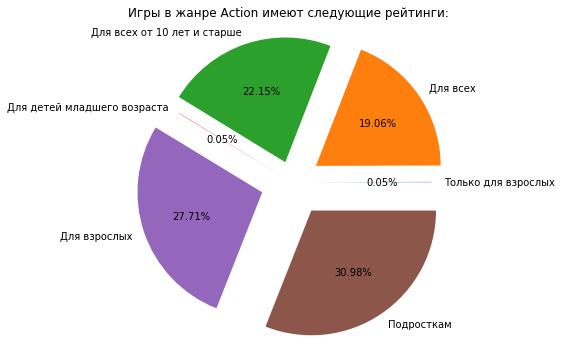

In [80]:
# запустим функцию по жанру Action и списку рейтингов присвоенных играм в этом жанре
funct_genre('Action',action)

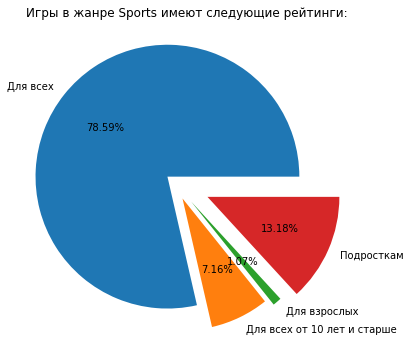

In [81]:
dict_genre_to_rating={}
funct_genre('Sports',sports)

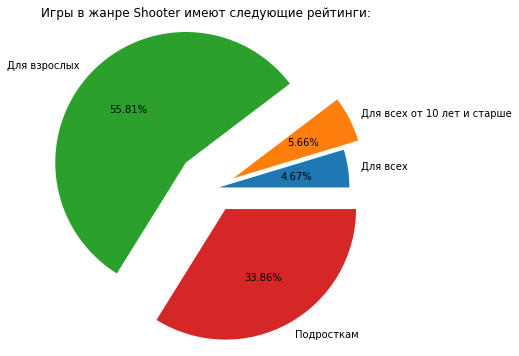

In [82]:
dict_genre_to_rating={}
funct_genre('Shooter',shooter)

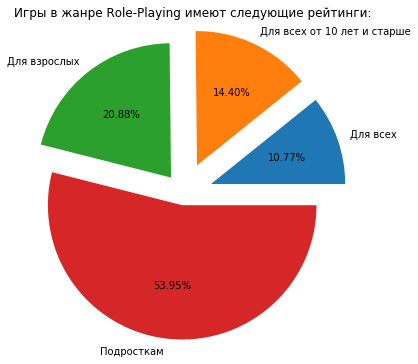

In [83]:
dict_genre_to_rating={}
funct_genre('Role-Playing',role_playing)

##### Итак, судя по получившимся пирогам, мы видим, что 56% шутеров для взрослых, а значит в Японии соблюдается закон, не допуская продаж игр детям, в соответствии с рейтингом ESRB.

### Шаг 5. Проверим гипотезы

#### 5.1. Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, используется метод (Стьюдента) для это в Python есть библиотека scipy импортировав которую можно провести данный тест scipy.st.ttest_ind(array1, array1). Для проведения данного теста необходимо выбрать уровень значимости. Уровень значимости — это суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего. Выберем уровень значимости — 5%. Если наблюдаемое на выборке значение попадает в эту зону, вероятность такого события при верной нулевой гипотезе признаётся слишком малым (это определяется уровнем значимости). Следовательно, у нас есть основание отвергнуть нулевую гипотезу.

Создадим функцию make_ttest, в качестве параметров будем использовать сравнивыемые выборки и уровень значимости.

In [84]:
def make_ttest(array1,array2,alpha):
    alph = alpha # критический уровень статистической значимости
    results = st.ttest_ind(array1,array2)
    print('p-значение: ', results.pvalue)
    if (results.pvalue < alph):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Подготовим выборки и запустим функцию make_ttest.

In [85]:
# выборка оценок пользователей по платформе XOne
array_xone=data.query('platform=="XOne" & user_score.notnull()')['user_score']
# выборка оценок пользователей по платформе PC
array_pc=data.query('platform=="PC" & user_score.notnull()')['user_score']
make_ttest(array_xone,array_pc,0.05)

p-значение:  5.709734789456595e-06
Отвергаем нулевую гипотезу


##### Отвергаем нулевую гипотезу, означает, что генеральные совокупности величин различны, равносильно  утверждению, что cредние пользовательские рейтинги платформ различаются.

#### 5.2. Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные."

In [86]:
# выборка оценок пользователей по жанру Action
array_action=data.query('genre=="Action" & user_score.notnull()')['user_score']
# выборка оценок пользователей по жанру Sports
array_sports=data.query('genre=="Sports" & user_score.notnull()')['user_score']
make_ttest(array_action,array_sports,0.05)

p-значение:  0.17843526707858468
Не получилось отвергнуть нулевую гипотезу


##### Не получилось отвергнуть нулевую гипотезу, означает, что генеральные совокупности величин равны, равносильно утверждению, что cредние пользовательские рейтинги платформ одинаковы.

## ВЫВОД:

##### Исследовательский анализ данных проведен, выявлены следующие факты:

* Количество выпускаемых игр из года в год росло до 2008, затем начало сокращаться. Распределение выпускаемых игр похоже на нормальное распределение (колокол). При этом мы видели ранее, что выручка от игр росла до 2008, и это значит, что чем больше выпускалось игр, тем больше было выручки.

* игры выпускаемые на платформах прошли свой пик продаж и в стадии затухания, дело в том, что появился новый рынок игр для мобильных устройств,который отъедает позиции у приставок. Видим, что в 2015-2016 выручка составляла уровень конца 90х начала 2000 годов. А значит в 2017 выручка будет примерно на этом уровне тех лет.

* По результатам расчетов поределили, что платформы живут в среднем 7,6 лет, медианное зачение 6 лет и жизнь платформы подчинена закону нормальному распределению. Также есть и долгожители PC - 31 год. Платформы, которые не получают успеха - отмирают на 1м году жизни.

* ТОП-5 платформ по которым наибольшее число продаж игр(в млн):
PS2           1235.79                 
X360           966.26                   
PS3            934.52                     
Wii            903.31                     
DS             804.28

* ТОП-5 платформ на сегодня:
 X360, XOne, PS3, PS4, 3DS
 
* Выянили, что есть положительная корреляция отзывов на выручку, но она незначительная. Более выражена на отзывах от критиков.

* Больше всего игр выпущено в жанре Action, второе место Sports, третье место Misc(разнообразный жанр). Ролевые, шутеры прикючения и гонки примерно на одном ровне и делят 4-7места.

* Самый прибыльный жанр Action, ТОП-5 замыкает Platform
Action            1733.79
Sports            1315.91
Shooter           1046.96
Role-Playing       931.44
Platform           825.55

* Также определили, что на всех платформах выпускаются игры в разных жанрах, за незначительным исключением.

* ТОП-3 для Северной Америки и Европы совпадают по жанру это Action, Spors и Shooter. На Японском рынке ТОП-3 присутствует, также Action и Spors, но возглавляет рейтинг игры в жанре Role-Playing. Мало того игры в жанре Shooter не входят даже в 5ку жанров на Японском рынке игр

* Американский рынок приносит почти половину всей выручки от продаж игр в мире. Почти вдвое превышает уровень продаж в Европе, и более чем в три раза продажи Японии.